In [5]:
from matplotlib import pyplot
from shapely.geometry import LineString
from descartes import PolygonPatch

from figures import SIZE, BLUE, GRAY, set_limits, plot_line
%matplotlib inline

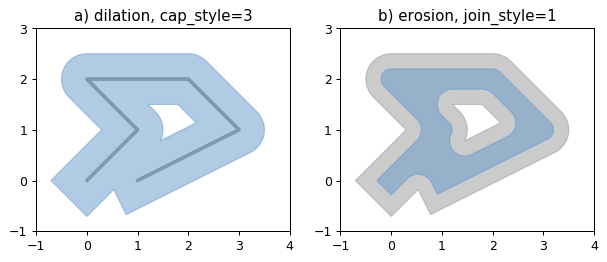

In [6]:
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])

fig = pyplot.figure(1, figsize=SIZE, dpi=90)

# 1
ax = fig.add_subplot(121)

plot_line(ax, line)

dilated = line.buffer(0.5, cap_style=3)
patch1 = PolygonPatch(dilated, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2)
ax.add_patch(patch1)

ax.set_title('a) dilation, cap_style=3')

set_limits(ax, -1, 4, -1, 3)

#2
ax = fig.add_subplot(122)

patch2a = PolygonPatch(dilated, fc=GRAY, ec=GRAY, alpha=0.5, zorder=1)
ax.add_patch(patch2a)

eroded = dilated.buffer(-0.3)

# GeoJSON-like data works as well

polygon = eroded.__geo_interface__
# >>> geo['type']
# 'Polygon'
# >>> geo['coordinates'][0][:2]
# ((0.50502525316941682, 0.78786796564403572), (0.5247963548222736, 0.8096820147509064))
patch2b = PolygonPatch(polygon, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2)
ax.add_patch(patch2b)

ax.set_title('b) erosion, join_style=1')

set_limits(ax, -1, 4, -1, 3)

pyplot.show()